##### Importando as bibliotecas 

In [128]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score

##### - Importação da Base de dados. 

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/jefferson-oliva/databases/main/breast_cancer.csv')
df.head()

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


##### Pré-procesamento dos dados. 

In [130]:
d = {'benign': 0,
     'malignant': 1}

df['diagnosis'] = df['diagnosis'].map(d)
df.head()


,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


##### Gerando os rótulos

In [131]:
y = df['diagnosis'].values
print ('Classe de Diagnóstico:', np.unique(y))

Classe de Diagnóstico: [0 1]


##### Vetores  características

In [132]:
X = df.iloc[:, [1,2]].values

X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

#####  Base de dados para o conjunto de teste e treinamento.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123, stratify=y)
np.bincount(y_train)

array([250, 148], dtype=int64)

In [134]:
print ('y:', np.bincount(y))
print ('y_train:', np.bincount(y_train))
print ('y_test:', np.bincount(y_test))

y: [357 212]
y_train: [250 148]
y_test: [107  64]


##### Gerando Pipeline de dados

In [135]:
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA()),
        ('classify', DecisionTreeClassifier())])

In [136]:
parameters = {
    'reduce_dim__n_components': list(range (1,4)),
    'classify__criterion':['gini', 'entropy'],
    'classify__max_depth': list(range(1,10,2))
}

##### Fitando a base de treinamento

In [137]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('z-score', StandardScaler()), ('reduce_dim', PCA()),
                ('classify', DecisionTreeClassifier())])

#####  Para realizar as tranformações : "pipe.predict"

In [138]:
from sklearn.metrics import accuracy_score

y_test_pred = pipe.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8654970760233918

##### Gerando GridSearch

In [125]:
param_grid = {
   'reduce_dim__n_components': [1, 2],
    'classify__n_neighbors': [2, 3]
}



In [139]:
grid = GridSearchCV(pipe, cv=2, n_jobs=1, param_grid=parameters, scoring='accuracy')

In [140]:
grid.fit(X_train, y_train)

C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\mttvi\anacond

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('z-score', StandardScaler()),
                                       ('reduce_dim', PCA()),
                                       ('classify', DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid={'classify__criterion': ['gini', 'entropy'],
                         'classify__max_depth': [1, 3, 5, 7, 9],
                         'reduce_dim__n_components': [1, 2, 3]},
             scoring='accuracy')

In [141]:
print(grid.cv_results_)

{'mean_fit_time': array([0.09024441, 0.0077945 , 0.        , 0.00781441, 0.00791478,
       0.00253356, 0.00744689, 0.        , 0.        , 0.        ,
       0.01721704, 0.        , 0.00650418, 0.01775324, 0.        ,
       0.03166091, 0.00064695, 0.00350332, 0.00466788, 0.        ,
       0.        , 0.        , 0.00459146, 0.00041771, 0.00741482,
       0.00187087, 0.        , 0.00797892, 0.        , 0.00121069]), 'std_fit_time': array([0.09024441, 0.0077945 , 0.        , 0.00781441, 0.00791478,
       0.00253356, 0.00055754, 0.        , 0.        , 0.        ,
       0.01721704, 0.        , 0.00650418, 0.01775324, 0.        ,
       0.03166091, 0.00064695, 0.00350332, 0.00466788, 0.        ,
       0.        , 0.        , 0.00459146, 0.00041771, 0.00741482,
       0.00187087, 0.        , 0.00797892, 0.        , 0.00121069]), 'mean_score_time': array([0.21757674, 0.        , 0.        , 0.00102949, 0.        ,
       0.        , 0.00075674, 0.        , 0.        , 0.        ,
     

##### Gerando um novo classificador(com o melhor desempenho) dentro do Grid

In [142]:
clf = grid.best_estimator_

##### Avaliando da performance do modelo(base de teste separada) e o classificador de melhor hiperparâmetro

In [143]:
y_test_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8830409356725146

##### Gerando arvore de decisão

In [144]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

##### Avaliando a acurácia("predict")

In [145]:
y_test_pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9064327485380117

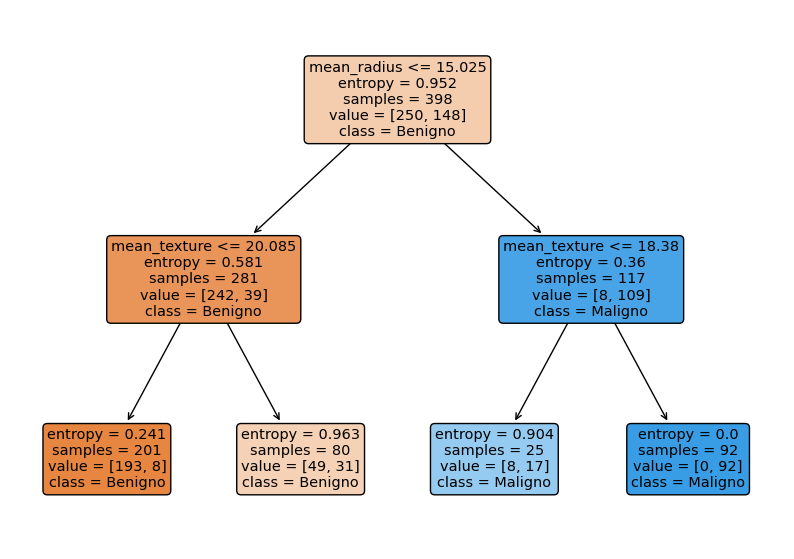

In [146]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))

plot_tree(dt_model, filled=True, rounded=True,
          class_names=['Benigno', 'Maligno'],
          feature_names=['mean_radius', 'mean_texture'])

plt.show()

##### Seleção da amaostra( n_1)

In [147]:
print (np.shape(X_test))
print (np.shape(y_test))

X_test1 = X_test[1,:]
y_test1 = y_test[1]

print (np.shape(X_test1))
print (np.shape(y_test1))

X_test1 = np.reshape(X_test1, (1,-1))
y_test1 = np.reshape(y_test1, (1))

print (np.shape(X_test1))
print (np.shape(y_test1))

(171, 2)
(171,)
(2,)
()
(1, 2)
(1,)


##### Verificar a classe da amaostra escolhida. 

In [148]:
y_test1_pred = dt_model.predict(X_test1)

y_test1_pred

array([0], dtype=int64)

##### Validação da amostra escolhida.

In [149]:
accuracy_score(y_test1, y_test1_pred)

1.0

In [150]:
X_test1

array([[ 9.504, 12.44 ]])

##### Caractéristicas e conclusão

Mean_radius = 9.504
Mean_texture = 12.44

if Mean_radius <= 15.025 (verdadeiro)

if Mean_texture <= 20.085 (verdadeiro)

Class = Benigno